In [32]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes/diabetes.csv


In [33]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
df = pd.read_csv("/kaggle/input/diabetes/diabetes.csv")

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

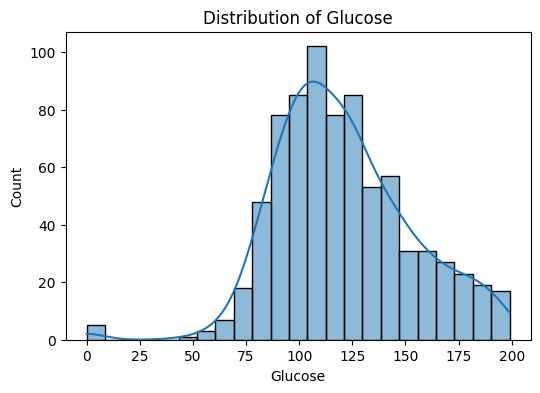

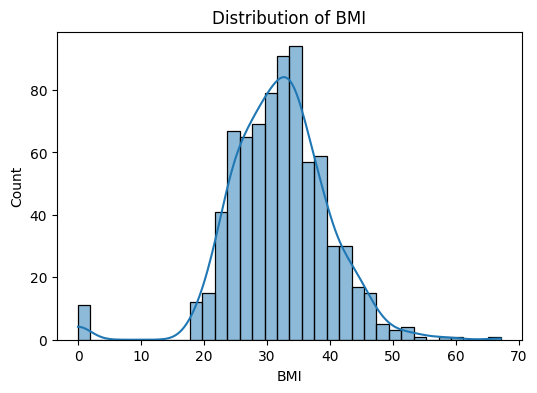

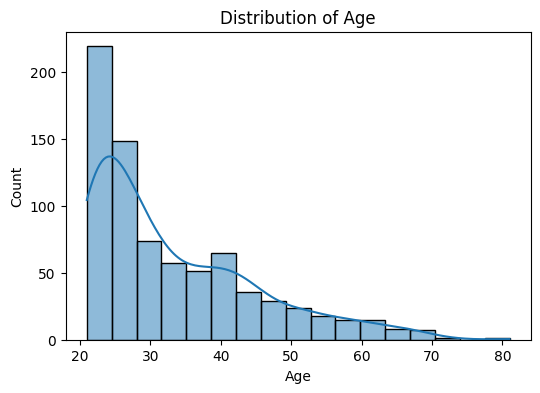

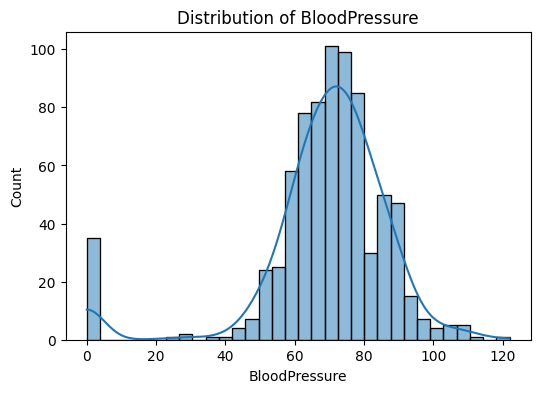

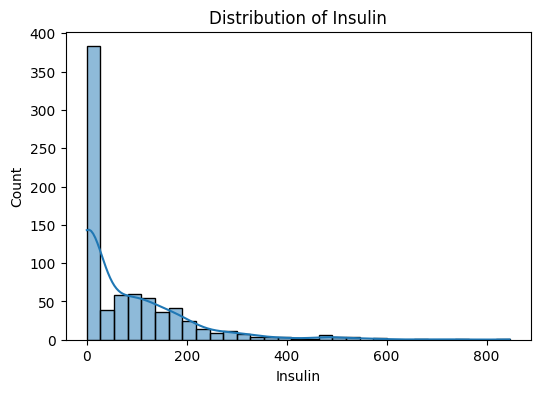

In [36]:
# Features to visualize
features = ['Glucose', 'BMI', 'Age', 'BloodPressure', 'Insulin']

# Plotting distributions
for feature in features:
    plt.figure(figsize=(6,4))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

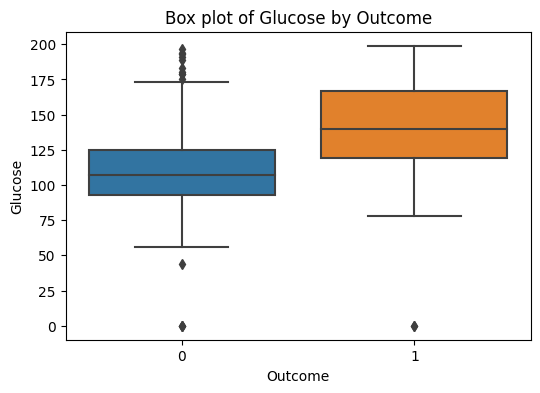

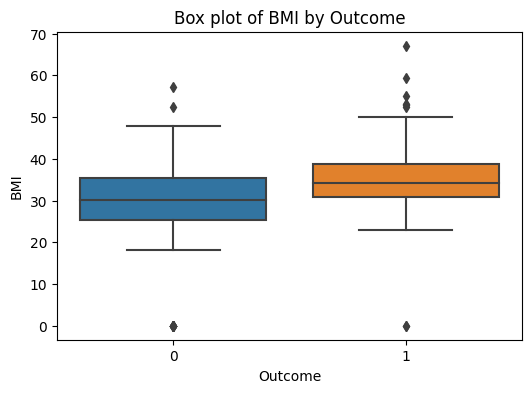

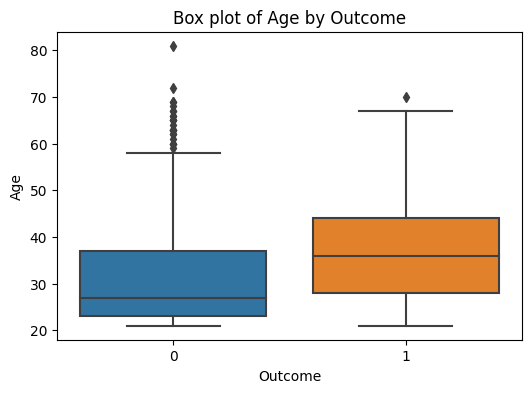

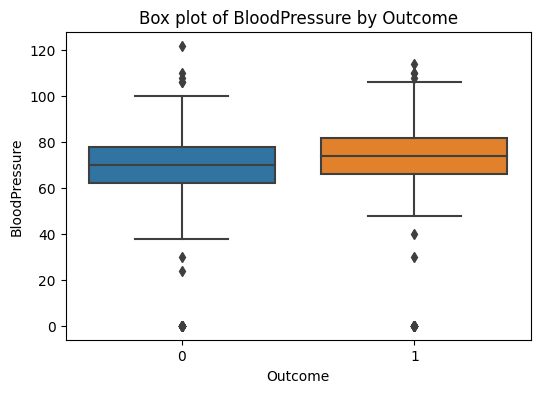

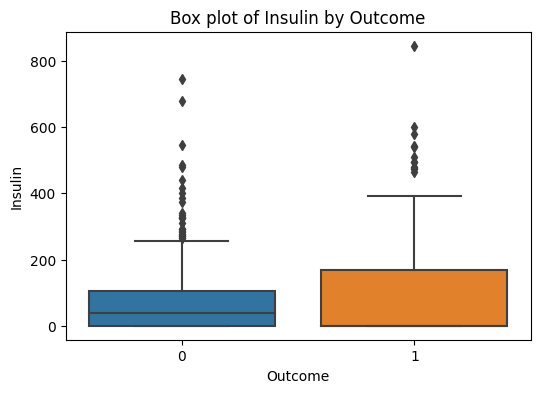

In [37]:
for feature in features:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x='Outcome', y=feature)
    plt.title(f'Box plot of {feature} by Outcome')
    plt.show()

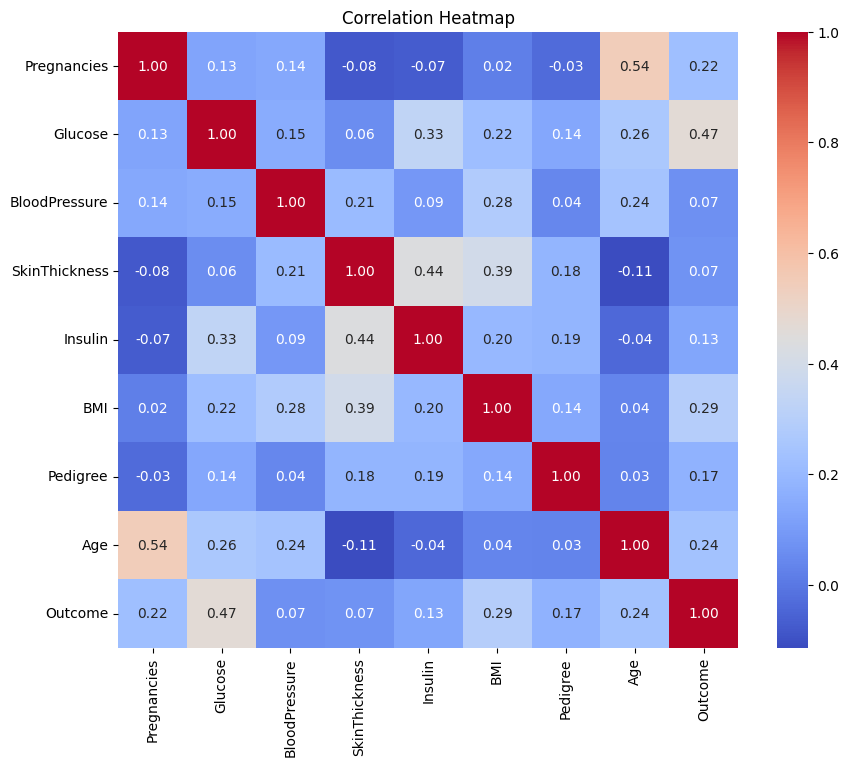

In [38]:
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

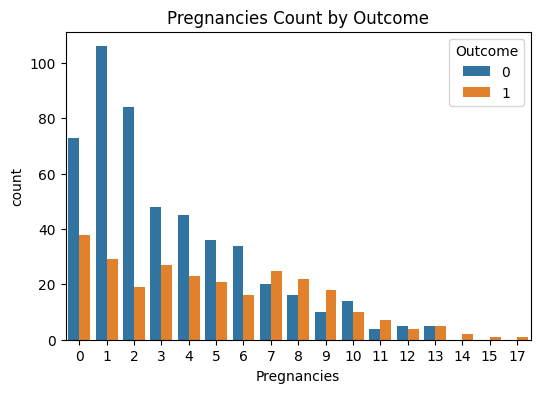

In [39]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Pregnancies', hue='Outcome')
plt.title('Pregnancies Count by Outcome')
plt.show()

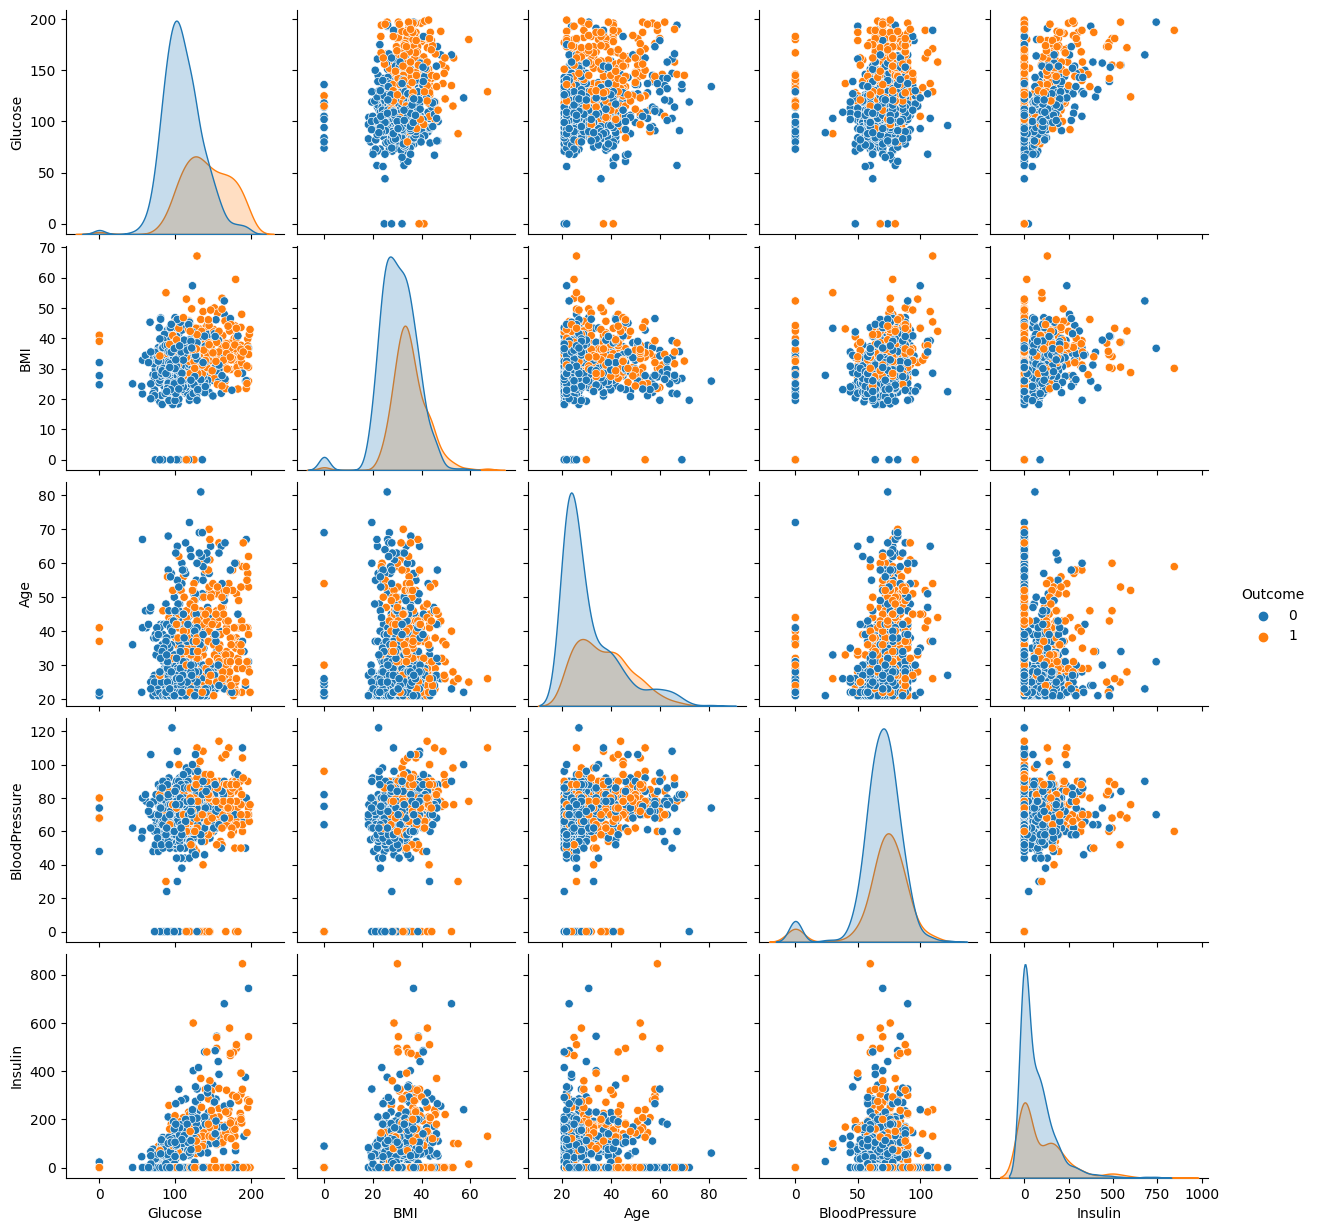

In [40]:
sns.pairplot(df, hue='Outcome', vars=['Glucose', 'BMI', 'Age', 'BloodPressure', 'Insulin'])
plt.show()

In [41]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=18)

In [45]:
y_pred = knn.predict(X_test)

In [46]:
error_rates = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    error_rates.append(np.mean(y_pred_k != y_test))

print('Error rates for different k:', error_rates)

Error rates for different k: [0.37662337662337664, 0.34415584415584416, 0.2922077922077922, 0.2987012987012987, 0.3051948051948052, 0.2987012987012987, 0.3181818181818182, 0.2922077922077922, 0.3181818181818182, 0.3116883116883117, 0.2922077922077922, 0.2792207792207792, 0.2922077922077922, 0.2727272727272727, 0.2792207792207792, 0.2532467532467532, 0.24675324675324675, 0.24025974025974026, 0.24025974025974026, 0.24025974025974026]


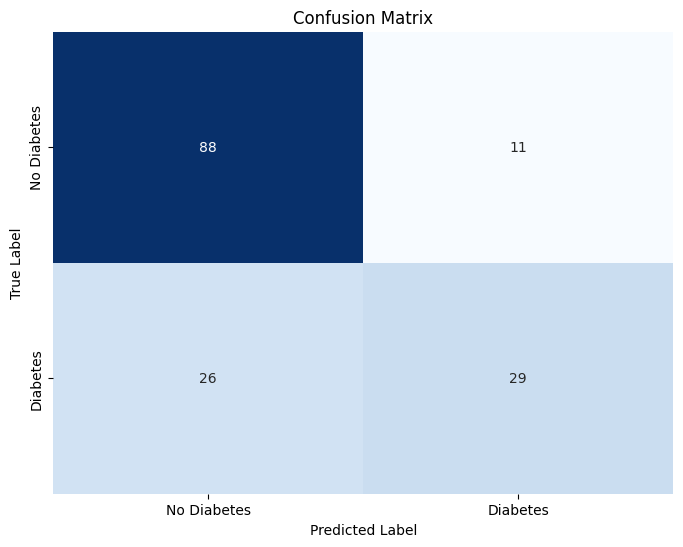

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['No Diabetes', 'Diabetes'], 
            yticklabels=['No Diabetes', 'Diabetes'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [48]:
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
print('Accuracy:', accuracy)
print('Error Rate:', error_rate)

Accuracy: 0.7597402597402597
Error Rate: 0.24025974025974028


In [49]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('Precision:', precision)
print('Recall:', recall)

Precision: 0.725
Recall: 0.5272727272727272
